In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import random
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

sns.set(style='white', context='notebook', palette='deep')

C:\Users\karth\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

In [4]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]

In [5]:
def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ELA_filename = filename.split('.')[0] + '.ela.png'
    
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    return ela_im

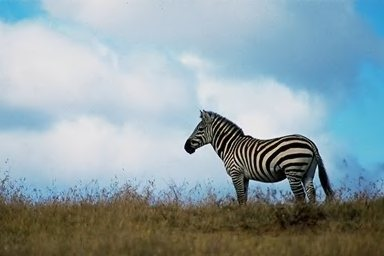

In [6]:
Image.open('dataset\Au\Au_ani_0001.jpg')

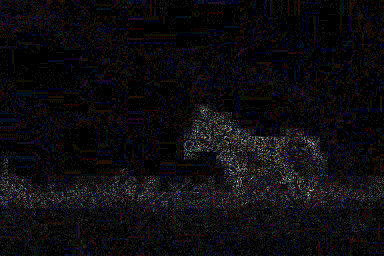

In [7]:
convert_to_ela_image('dataset\Au\Au_ani_0001.jpg',90)

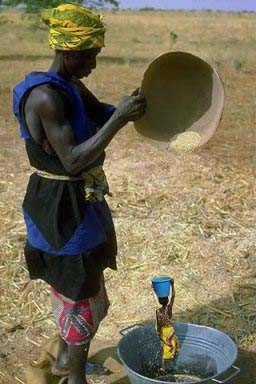

In [8]:
Image.open('dataset\Sp\Sp_D_NNN_A_cha0006_cha0003_0303.jpg')

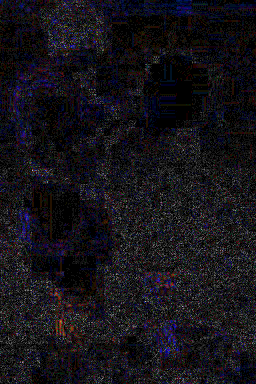

In [9]:
convert_to_ela_image('dataset\Sp\Sp_D_NNN_A_cha0006_cha0003_0303.jpg',90)

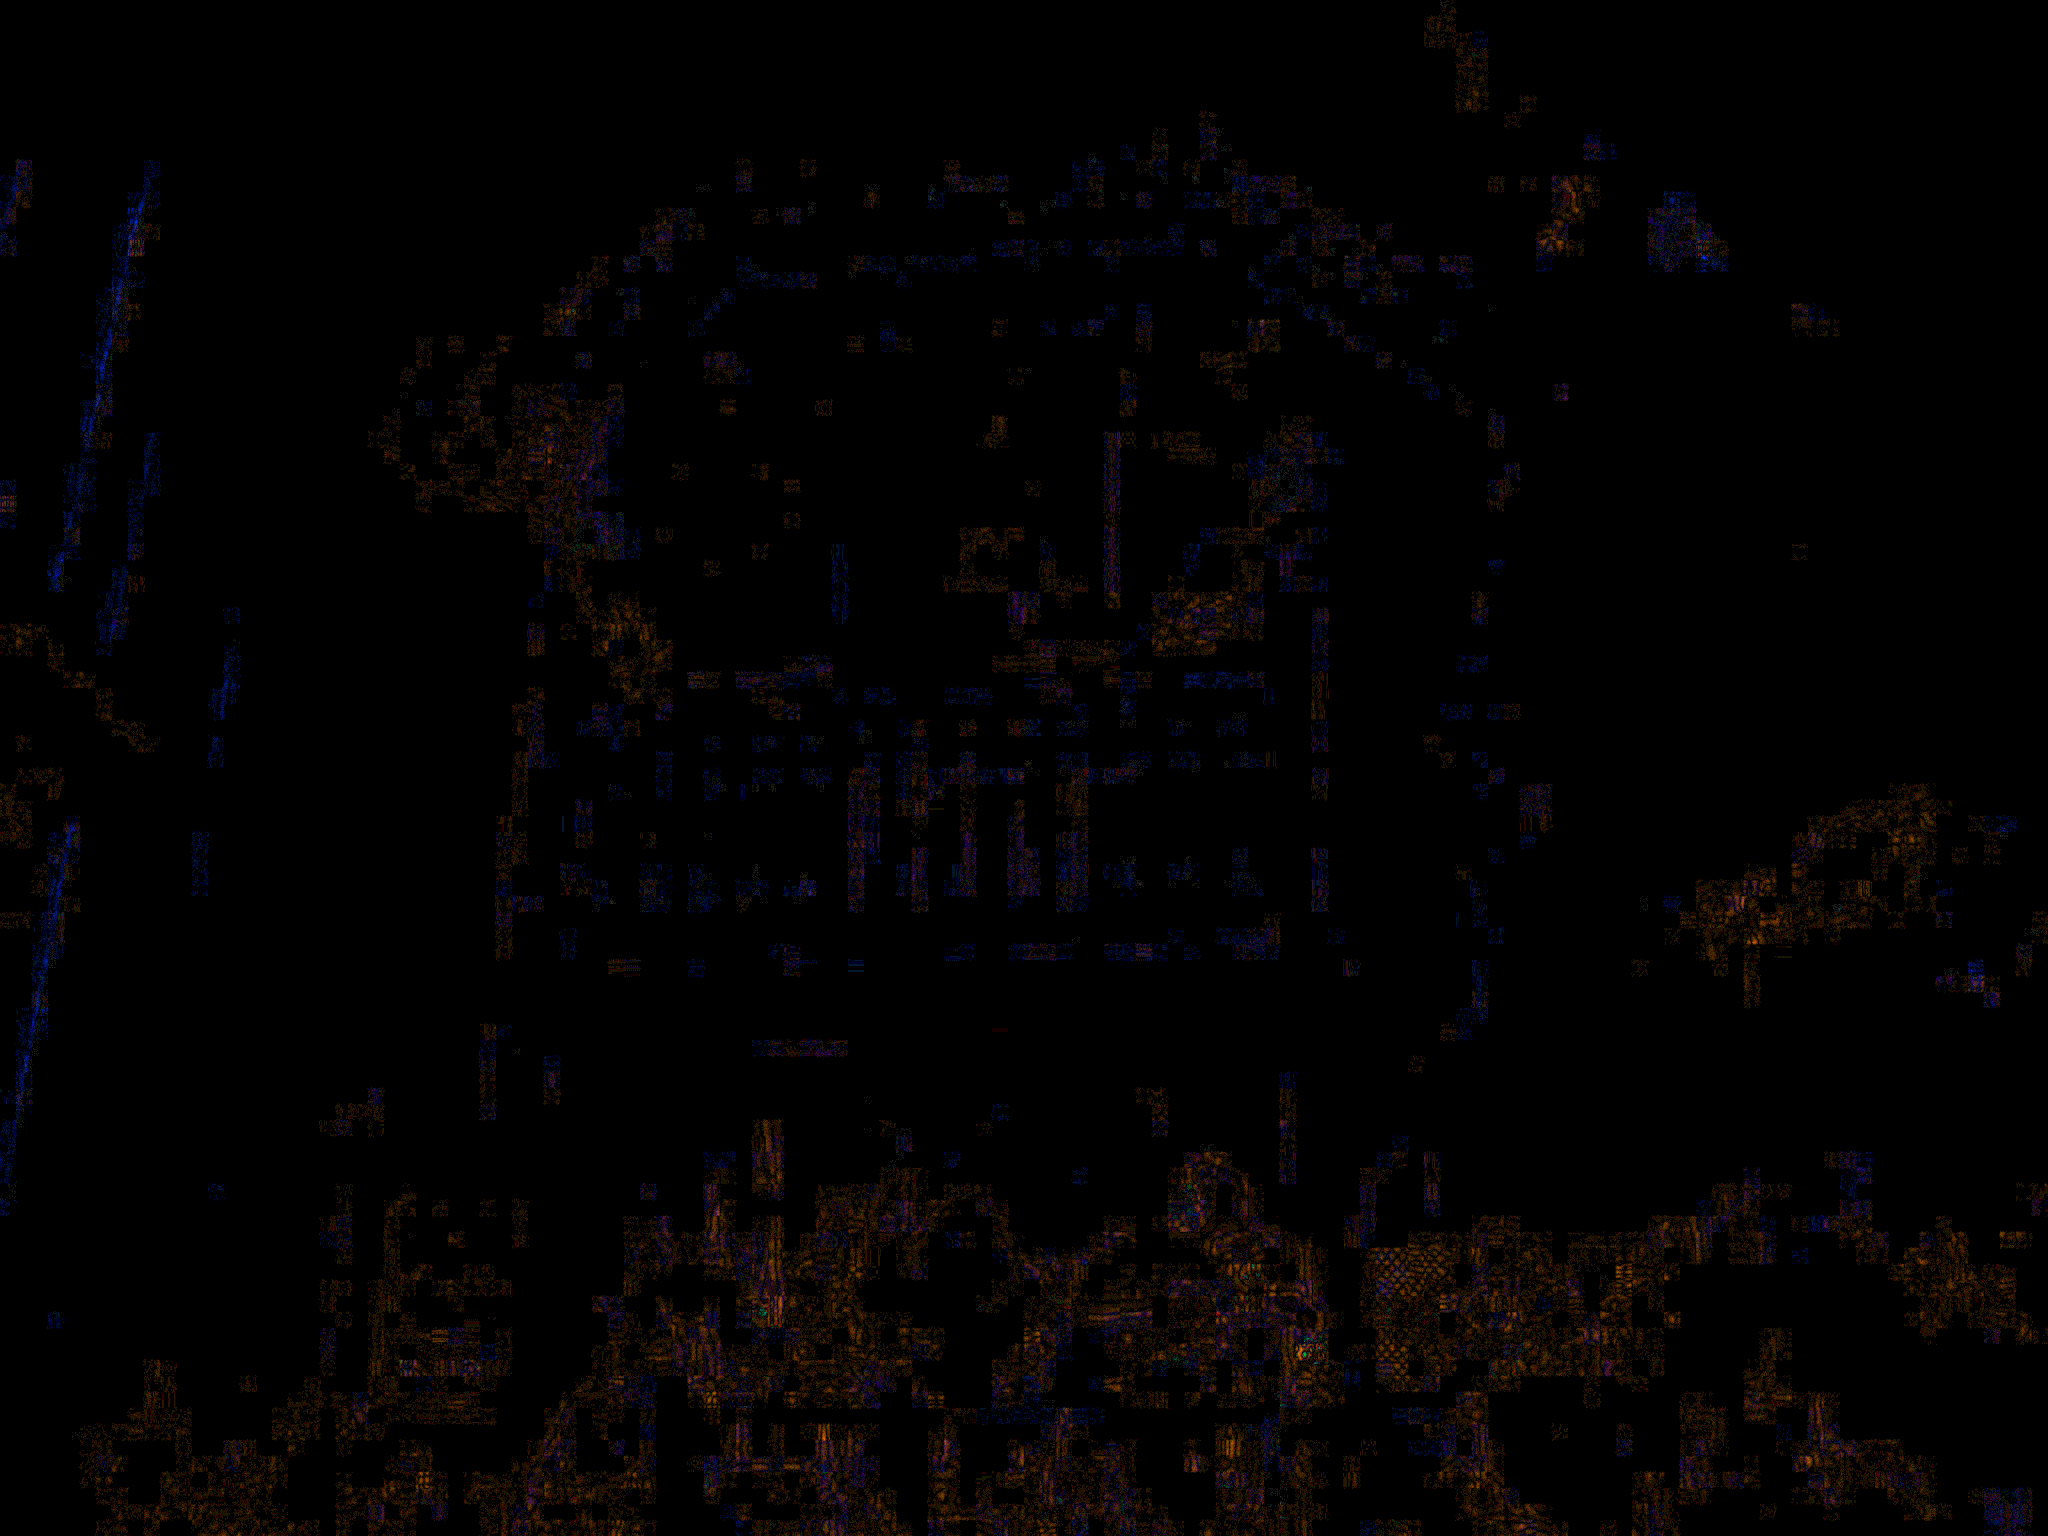

In [12]:
convert_to_ela_image('DSC_0013_01tamp11.saved.jpg',90)

In [20]:
dataset = pd.read_csv('dataset.csv')
dataset

,C:/Users/karth/Documents/mini_project/Casia/CASIA1/Sp/Sp_D_CND_A_pla0005_pla0023_0281.jpg,1
0,C:/Users/karth/Documents/mini_project/Casia/CA...,1
1,C:/Users/karth/Documents/mini_project/Casia/CA...,1
2,C:/Users/karth/Documents/mini_project/Casia/CA...,1
3,C:/Users/karth/Documents/mini_project/Casia/CA...,1
4,C:/Users/karth/Documents/mini_project/Casia/CA...,1
...,...,...
3435,C:/Users/karth/Documents/mini_project/Casia/CA...,0
3436,C:/Users/karth/Documents/mini_project/Casia/CA...,0
3437,C:/Users/karth/Documents/mini_project/Casia/CA...,0
3438,C:/Users/karth/Documents/mini_project/Casia/CA...,0


In [21]:
X = []
Y = []

In [23]:
for index, row in dataset.iterrows():
    X.append(array(convert_to_ela_image(row[0],90).resize((128,128))).flatten() / 255.0)
    Y.append(row[1])

In [24]:
X = np.array(X)
Y = to_categorical(Y, 2)

In [25]:
X = X.reshape(-1, 128, 128, 3)

In [26]:
#Train-Test-split

X_train,X_val,Y_train,Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [27]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu', input_shape = (128,128,3)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                 activation ='relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

C:\Users\karth\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Input:  (None, 128, 128, 3)
Output:  (None, 124, 124, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 120, 120, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 60, 60, 32)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 120, 120, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      29,491,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,520,034 (112.61 MB)

 Trainable params: 29,520,034 (112.61 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
optimizer = Adam(learning_rate=0.0005)

In [40]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [41]:
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0, mode = 'max')

In [42]:
epochs = 30
batch_size = 100

In [43]:
history = model.fit(X_train, Y_train, batch_size, epochs = epochs, 
                   validation_data = (X_val, Y_val), verbose = 2, callbacks = [early_stopping])

Epoch 1/30
28/28 - 51s - 2s/step - accuracy: 0.8924 - loss: 0.2815 - val_accuracy: 0.6134 - val_loss: 0.8216
Epoch 2/30
28/28 - 41s - 1s/step - accuracy: 0.9397 - loss: 0.1847 - val_accuracy: 0.6410 - val_loss: 0.8866
Epoch 3/30
28/28 - 41s - 1s/step - accuracy: 0.9466 - loss: 0.1518 - val_accuracy: 0.6090 - val_loss: 0.9955
Epoch 4/30
28/28 - 41s - 1s/step - accuracy: 0.9720 - loss: 0.1104 - val_accuracy: 0.6395 - val_loss: 1.0591


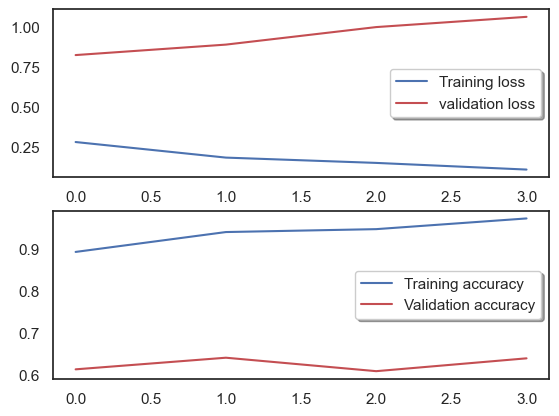

In [46]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step


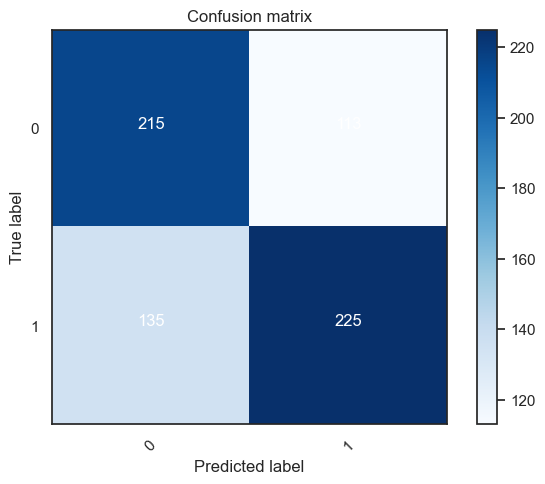

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [52]:
confusion_mtx

array([[215, 113],
       [135, 225]], dtype=int64)

In [59]:
image_path = os.getcwd() + "\\Figures"
Models_path = os.getcwd() + "\\Re_Traind_Models"
file_number = random.randint(1, 1000000)
plot_Name = image_path + "\\ELA_" + str(file_number) + ".png"
Model_Name = Models_path + "\\ELA_" + str(file_number) + ".h5"
# plt.savefig(plot_Name, transparent=True, bbox_incehs="tight", pad_inches=2, dpi=50)
model.save(Model_Name)